In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *
from shutil import copy

change_to_disk()
models_path = Path('Models_final_es/')
check_dir(models_path)

In [ ]:
device = get_device()
NUM_EPOCHS = 150
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 84, device)
print("Done")

FileNotFoundError: [Errno 2] No such file or directory: 'Models_final_es\\MobileNetSmall\\MobileNetSmall_84_150_epcs.pth'

In [ ]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 57, device)
print("Done")

Done


In [2]:
device = get_device()
NUM_EPOCHS = 150
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 53, device)
print("Done")

Done


In [3]:
#with the resize
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

transform = create_transform(resize,transf_tensor=True,normalize=True)

In [4]:
def get_prediction_name(predicted_labels):
    predicted_label = torch.argmax(torch.softmax(predicted_labels, dim=1), dim=1)
    if(predicted_label == 0):
        return "Good"
    elif(predicted_label == 1):
        return "Moderate"
    elif(predicted_label == 2):
        return "Poor"
    elif(predicted_label == 3):
        return "Very Poor"

In [5]:
#Send list of images and go through them and predict their label and display tem
def predict_labels(images, model):
    for i,image_path in enumerate(images):
        
        image = Image.open(image_path)
        pil_frame = Image.fromarray(np.uint8(image))
        img = transform(pil_frame)
        pred_label = model(img.unsqueeze(dim=0))
        label = get_prediction_name(pred_label)

        plt.imshow(pil_frame)
        plt.title(f"Predicted Label: {label}")
        plt.axis(False)
        plt.show()

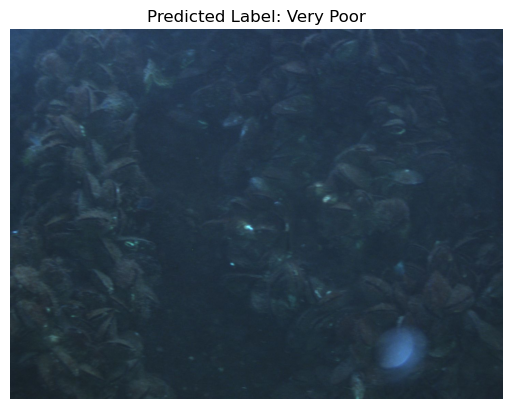

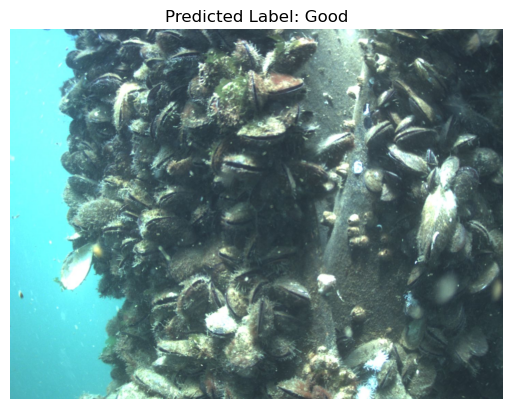

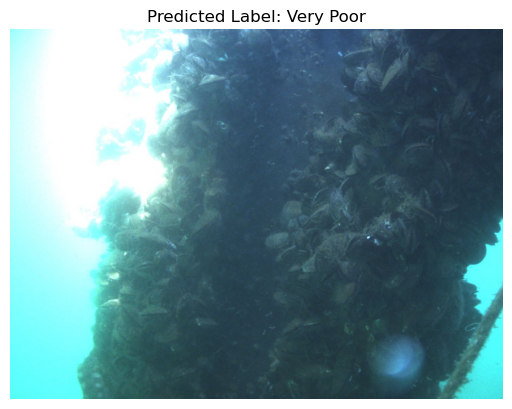

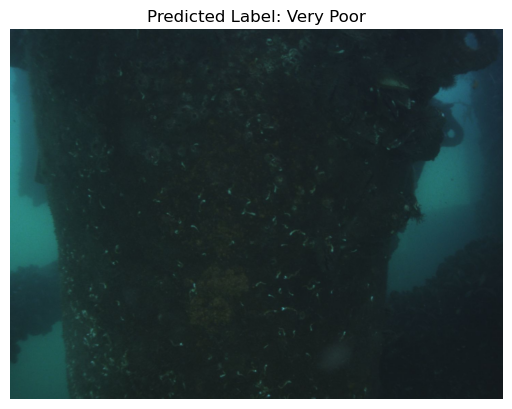

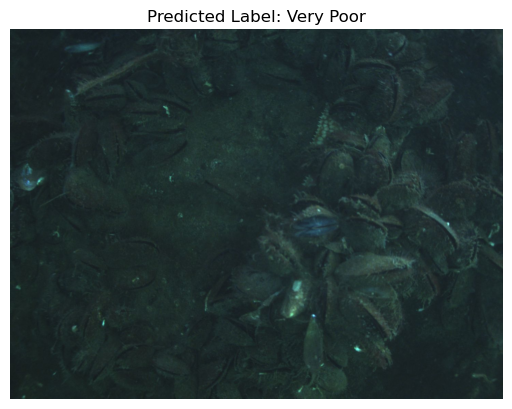

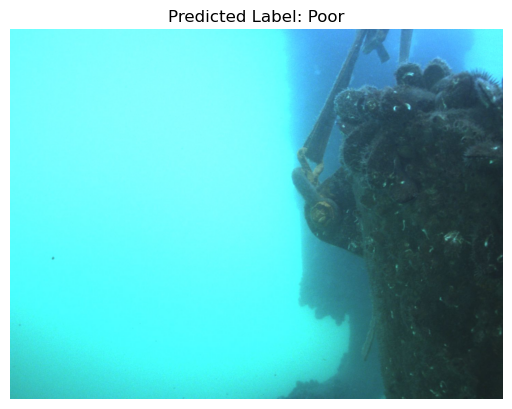

In [6]:
path_images = Path("inesc_frames")

list_frames = glob.glob( str(path_images) + "/*.png")

predict_labels(list_frames, best_res18_model)


In [9]:
video_path = 'Videos_labeled/new/unlabeled_unseen_data_15s.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a VideoWriter object to save the annotated frames
output_path = 'Videos_labeled/new/labeled_unseen_data_15s_effnetb0_j1k.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, frame_height - 50)
fontScale = 2
color = (255,255,255)
thickness = 4

# Iterate over each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    pil_frame = Image.fromarray(np.uint8(frame))

    img = transform(pil_frame)
    pred_label = best_effnetb0_model(img.unsqueeze(dim=0))
    label = get_prediction_name(pred_label)

    image = cv2.putText(frame, label, org, font, fontScale, color, thickness, cv2.LINE_AA)

    out.write(image)

cap.release()
out.release()

In [8]:
#!nvidia-smi


import torch

torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA GeForce GTX 1070', major=6, minor=1, total_memory=8191MB, multi_processor_count=16)

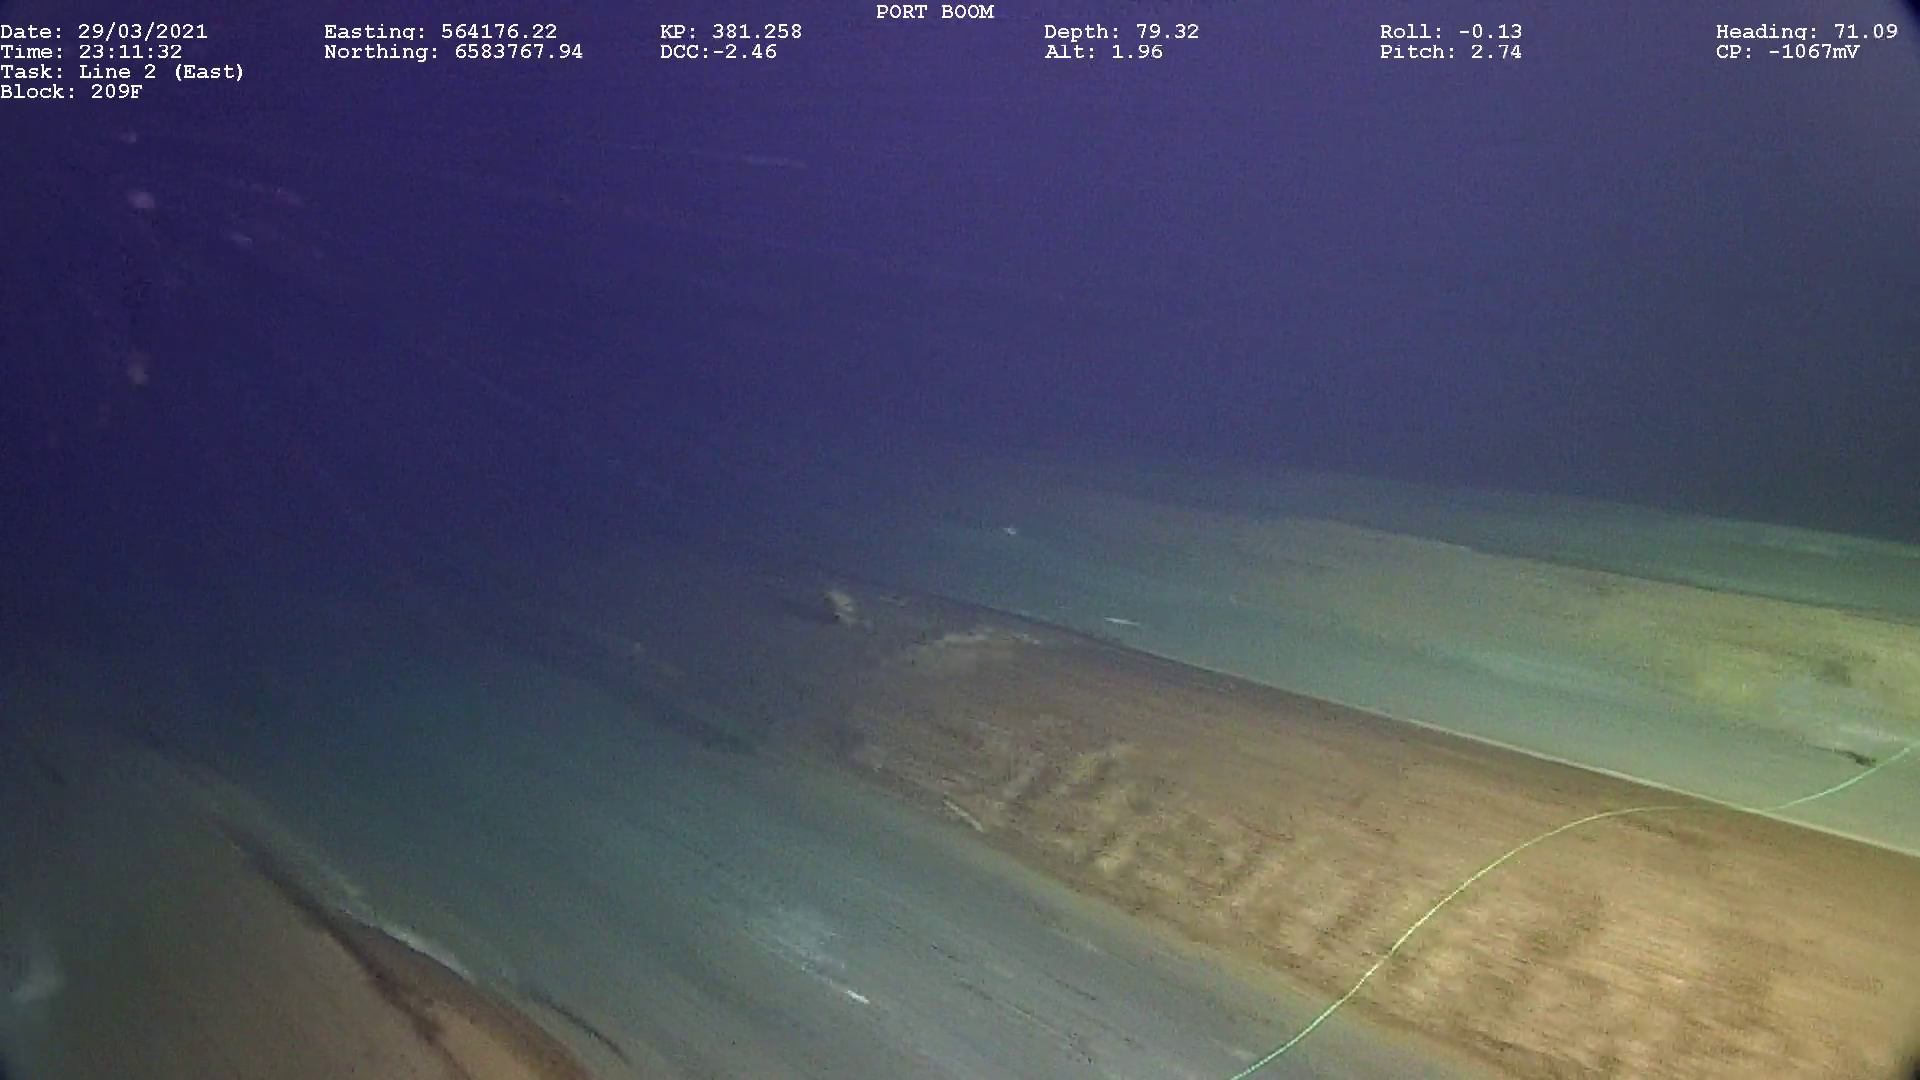

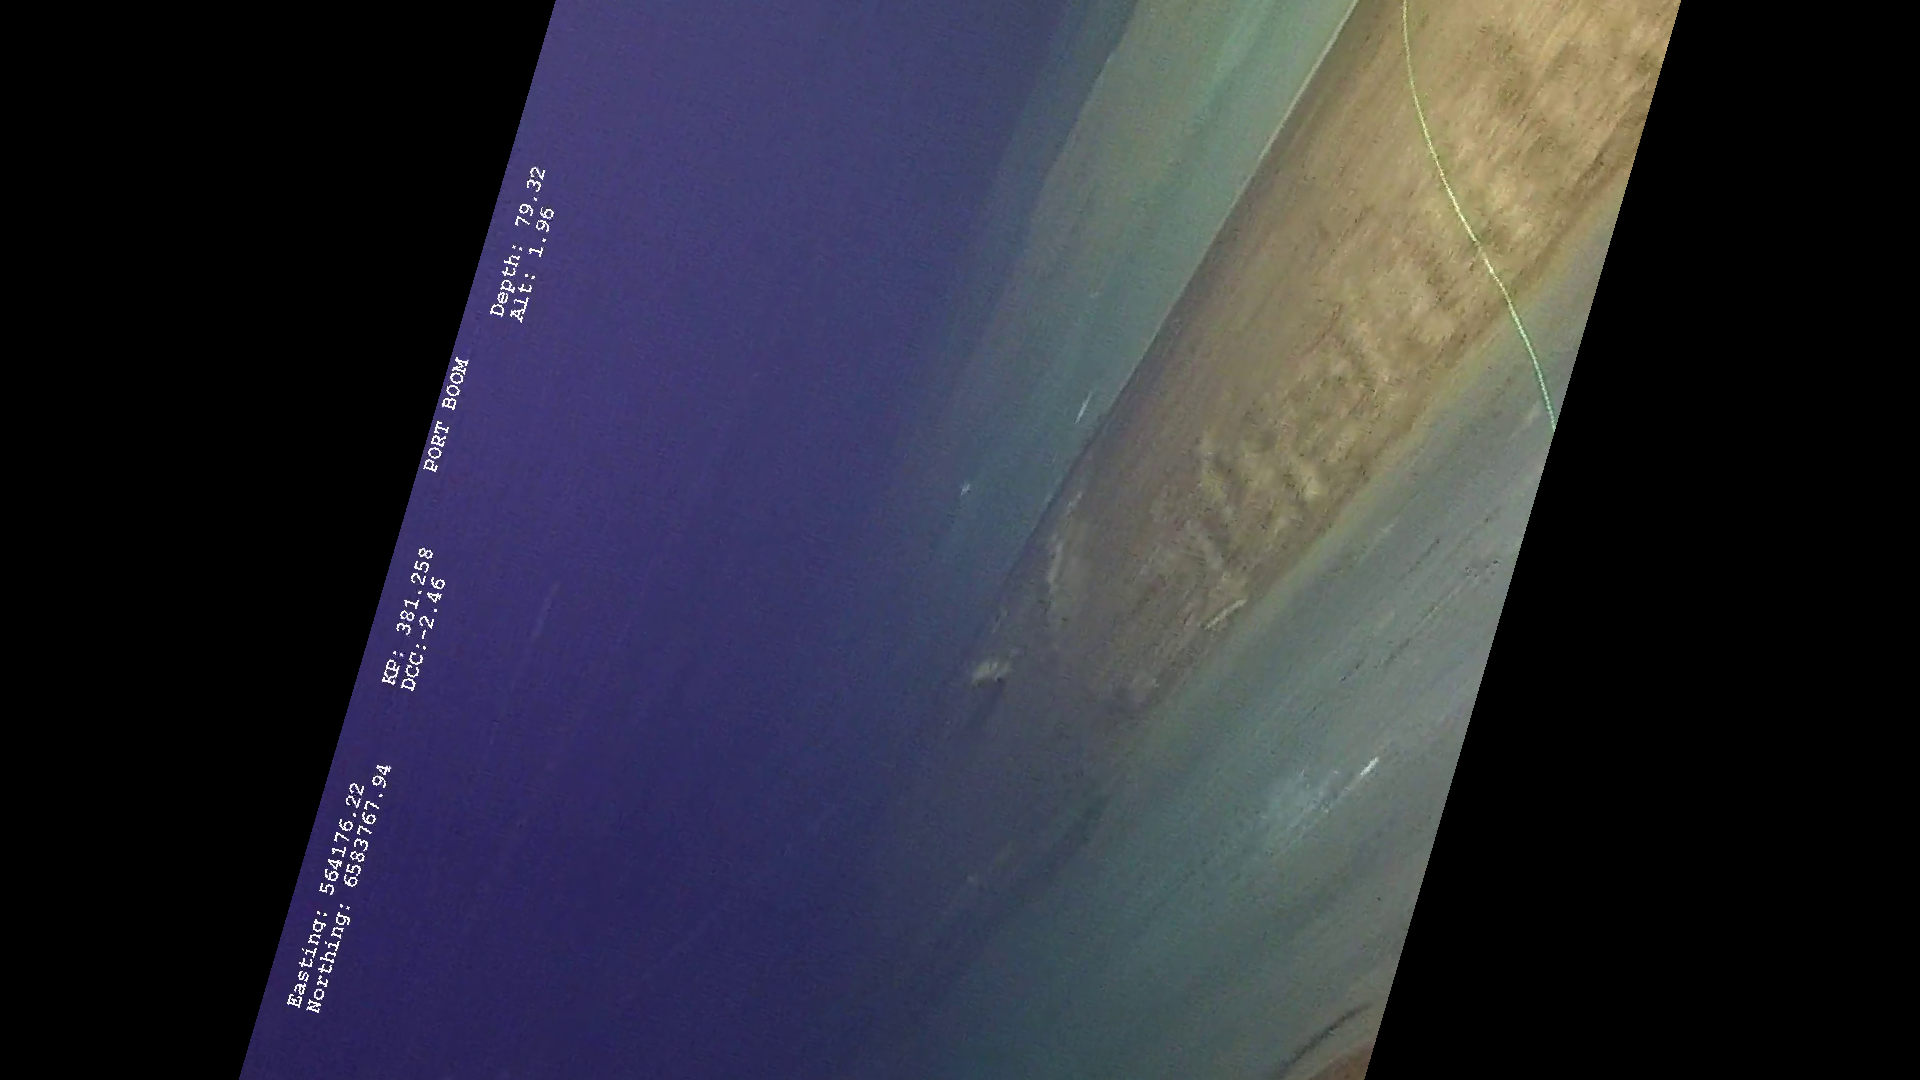

In [11]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *
from shutil import copy

change_to_disk()


path = Path("new_split_1k_all/train/2_Good/Video_32_Good_0_frame53109.png")

#with the resize
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

transform = create_transform(rotate=180,transf_tensor=False,normalize=False, color_dev=False, flip_h=False)

img = Image.open(path)

display(img)

img = transform(img)

display(img)


